In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pickle

from glob import glob
from itertools import product
from moviepy.editor import VideoFileClip
from IPython.display import HTML

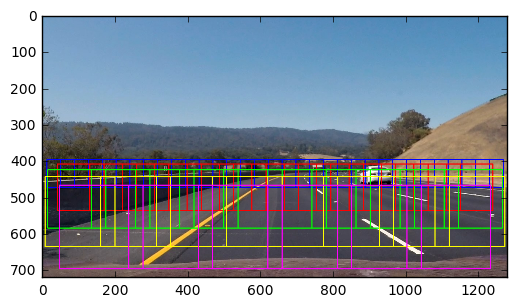

In [2]:
from find import *
from classifier import *

scales, windows, windows_scaled = box_generator((390, 600), (0, 1280), 
                                                yd_ratio = 0.1, 
                                                scales = [1.2,2.0,2.5,3.0,3.6], xover = 0.6)


img = cv2.cvtColor(cv2.imread('./test_images/test3.jpg'), cv2.COLOR_BGR2RGB)
color = [[0, 0, 255], [255, 0, 0], [0, 255, 0], [255, 255, 0], [255, 0, 255], [0, 255, 255], 
         [0, 0, 127], [0, 127, 0], [127, 0, 0]]
i = 0
s = 0
for wins in windows:
    s += len(windows)
    for win in wins:
        cv2.rectangle(img, tuple(win[0]), tuple(win[1]), color = color[i], thickness = 2)
    i = i + 1

plt.rcParams['figure.figsize'] = (6, 10)
plt.imshow(img)
plt.show()

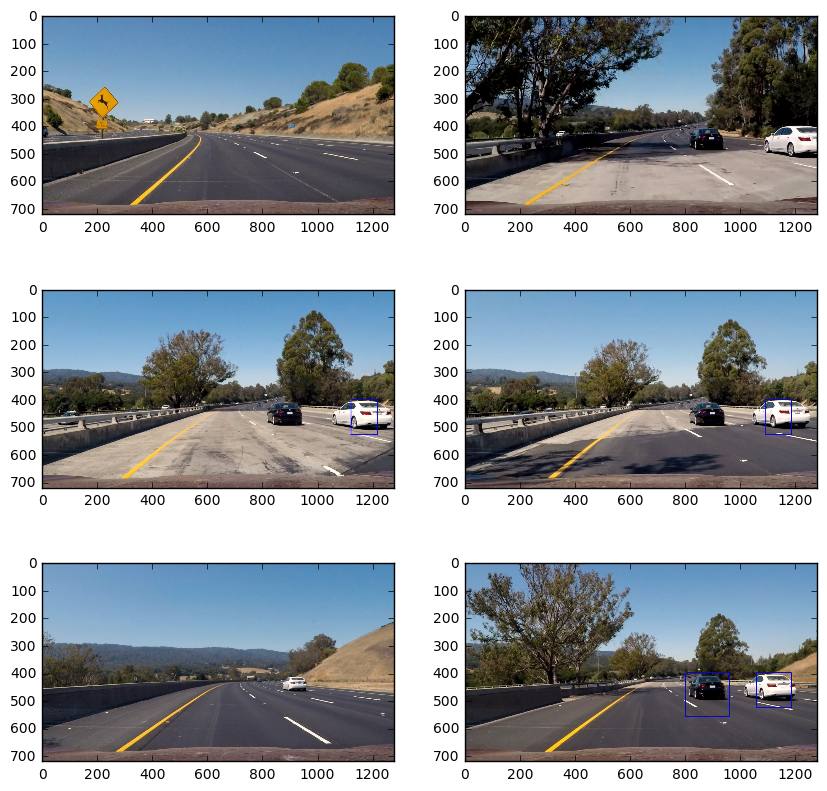

In [3]:
files = glob('./output_images/**.jpg')
plt.rcParams['figure.figsize'] = (10, 10)
row = len(files)//2
col = 2
fig, axes = plt.subplots(row, col)
for i in range(row):
    for j in range(col):
        axes[i][j].imshow(cv2.cvtColor(cv2.imread(files[col*i + j]), cv2.COLOR_BGR2RGB))
plt.show()

[[[ 5  5]
  [ 5  5]]

 [[ 5 -5]
  [ 5 -5]]

 [[ 5  0]
  [ 5  0]]

 [[-5  5]
  [-5  5]]

 [[-5 -5]
  [-5 -5]]

 [[-5  0]
  [-5  0]]

 [[ 0  5]
  [ 0  5]]

 [[ 0 -5]
  [ 0 -5]]]


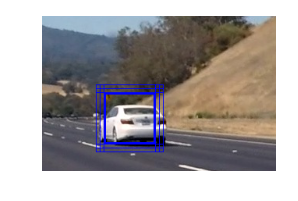

In [4]:
window = 64
img = cv2.cvtColor(cv2.imread('./test_images/test3.jpg'), cv2.COLOR_BGR2RGB)
infected = infected_box([[880, 400], [944, 464]])
cv2.rectangle(img, (880, 400), (944, 464), color = color[0], thickness = 2)
for i, win in enumerate(infected):
    cv2.rectangle(img, tuple(win[0]), tuple(win[1]), color = color[0], thickness = 1)
plt.rcParams['figure.figsize'] = (3, 3)
plt.imshow(img[300:500, 800:1100,:])
plt.axis('off')
plt.show()

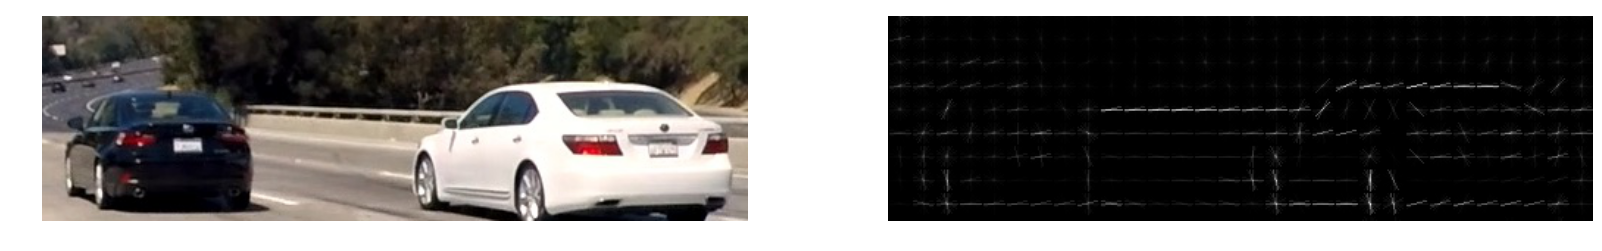

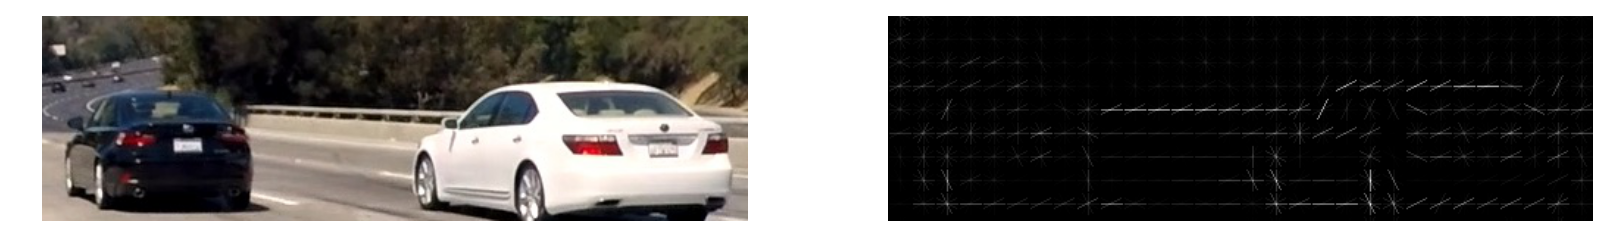

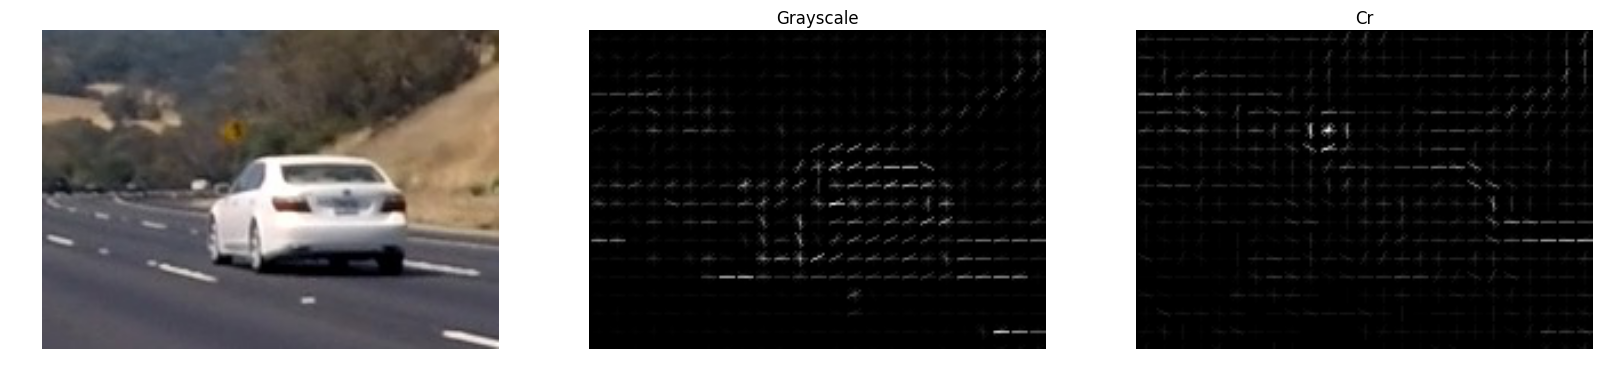

In [5]:
from classifier import *
img = cv2.cvtColor(cv2.imread('./test_images/test1.jpg'), cv2.COLOR_BGR2RGB)
chs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

feat, hog_map = hog(chs, orientations=2*ort,
                 pixels_per_cell=(ppc, ppc),
                cells_per_block=(cpb,cpb),
                visualise = True, transform_sqrt=False, feature_vector=False)

plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(121)
plt.imshow(img[360:500,800:1280])
plt.axis('off')
plt.subplot(122)
plt.imshow(hog_map[360:500,800:1280], cmap = 'gray')
plt.axis('off')
plt.show()

feat, hog_map = hog(chs, orientations=ort,
                 pixels_per_cell=(ppc, ppc),
                cells_per_block=(cpb,cpb),
                visualise = True, transform_sqrt=False, feature_vector=False)

plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(121)
plt.imshow(img[360:500,800:1280])
plt.axis('off')
plt.subplot(122)
plt.imshow(hog_map[360:500,800:1280], cmap = 'gray')
plt.axis('off')
plt.show()


ch = chs
img = cv2.cvtColor(cv2.imread('./test_images/test3.jpg'), cv2.COLOR_BGR2RGB)
ch = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)[:,:,1]
chs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
feat, hog_map = hog(ch, orientations=ort,
                 pixels_per_cell=(8, 8),
                cells_per_block=(cpb,cpb),
                visualise = True, transform_sqrt=False, feature_vector=False)
feat2, hog_map2 = hog(chs, orientations=ort,
                 pixels_per_cell=(8, 8),
                cells_per_block=(cpb,cpb),
                visualise = True, transform_sqrt=False, feature_vector=False)

plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(131)
plt.imshow(img[360:500,800:1000])
plt.axis('off')
plt.subplot(133)

plt.title('Cr')
plt.imshow(hog_map[360:500,800:1000], cmap = 'gray')
plt.axis('off')
plt.subplot(132)
plt.title('Grayscale')
plt.imshow(hog_map2[360:500,800:1000], cmap = 'gray')
plt.axis('off')
plt.show()

In [6]:
lazy_boxes = box_generator((370, 700), (0, 1280), yd_ratio = 0.3, scales = [1.5,3.0])

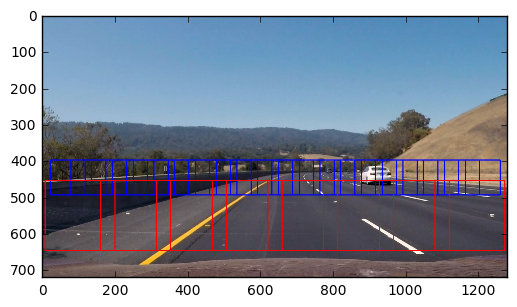

In [7]:
scales, windows, windows_scaled = lazy_boxes

img = cv2.cvtColor(cv2.imread('./test_images/test3.jpg'), cv2.COLOR_BGR2RGB)
color = [[0, 0, 255], [255, 0, 0], [0, 255, 0], [255, 255, 0], [255, 0, 255], [0, 255, 255], 
         [0, 0, 127], [0, 127, 0], [127, 0, 0]]
i = 0
s = 0
for wins in windows:
    s += len(windows)
    for win in wins:
        cv2.rectangle(img, tuple(win[0]), tuple(win[1]), color = color[i], thickness = 2)
    i = i + 1
plt.rcParams['figure.figsize'] = (6, 10)
plt.imshow(img)
plt.show()

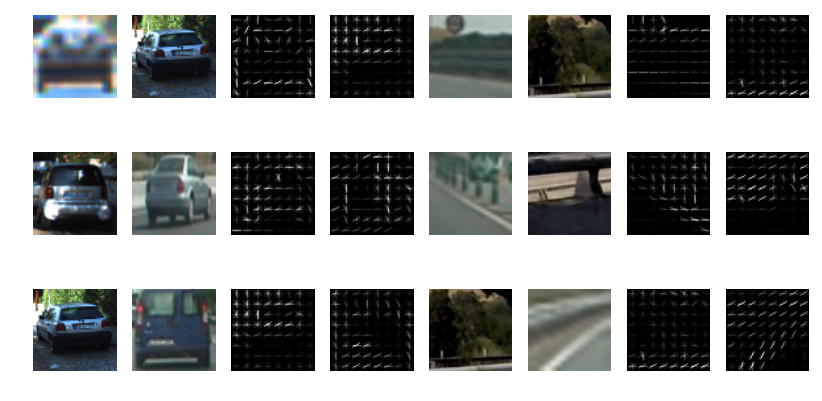

In [8]:

car_test = './toy_data/car'
non_test = './toy_data/non'

car_files = glob("%s/**"%car_test)
non_files = glob("%s/**"%non_test)


def hog_demo(img):
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    feat, hog_map = hog(im, orientations=ort,
                 pixels_per_cell=(8, 8),
                cells_per_block=(cpb, cpb),
                visualise = True, transform_sqrt=False, feature_vector=False)
    return hog_map

def sys2demo(imgf):
    img = cv2.imread(imgf)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

car = [sys2demo(f) for f in car_files]
non = [sys2demo(f) for f in non_files]

plt.rcParams['figure.figsize'] = (10, 5)
fig, axes = plt.subplots(3, 8)
for i in range(3):
    for j in range(2):
        for k in range(0,8,2):
            axes[i][j+k].axis('off')
        axes[i][j].imshow(car[i + j*2])
        axes[i][j+2].imshow(hog_demo(car[i + j*2]), cmap = 'gray')
        axes[i][j+4].imshow(non[i + j*2])
        axes[i][j+6].imshow(hog_demo(non[i + j*2]), cmap = 'gray')
        
plt.show()        

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("HLS"), axis_limits=[(0, 255), (0, 255), (0, 255)], axis_size = 0.1):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    
    fig = plt.figure(figsize=(2.5, 2.5))
    ax = Axes3D(fig)
    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])
    
    
    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=6, pad=0)
    ax.set_xlabel(axis_labels[0], fontsize=6, labelpad=-3)
    ax.set_ylabel(axis_labels[1], fontsize=6, labelpad=-3)
    ax.set_zlabel(axis_labels[2], fontsize=6, labelpad=-3)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none', s = 2)
    return ax  # return Axes3D object for further manipulation


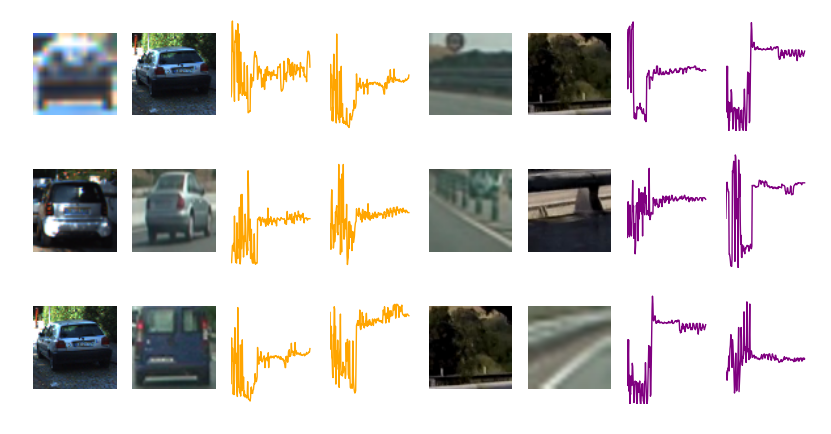

In [10]:
car_cvt = [cv2.cvtColor(car_, CVT[cspace]) for car_ in car]
non_cvt = [cv2.cvtColor(non_, CVT[cspace]) for non_ in non]


plt.rcParams['figure.figsize'] = (10, 5)
fig, axes = plt.subplots(3, 8)
for i in range(3):
    for j in range(2):
        for k in range(0,8,2):
            axes[i][j+k].axis('off')
        axes[i][j].imshow(car[i + j*2])
        axes[i][j+2].plot(color_bin_feat(car_cvt[i + j*2]), color = 'orange')
        axes[i][j+4].imshow(non[i + j*2])
        axes[i][j+6].plot(color_bin_feat(non_cvt[i + j*2]), color = 'purple')
        
plt.show() 

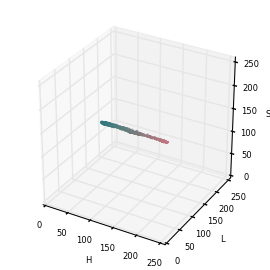

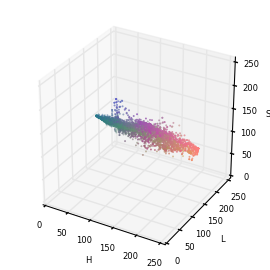

In [11]:

plot3d(non_cvt[0], non_cvt[0]/255)
plt.show()
plot3d(car_cvt[0], car_cvt[0]/255)
plt.show()

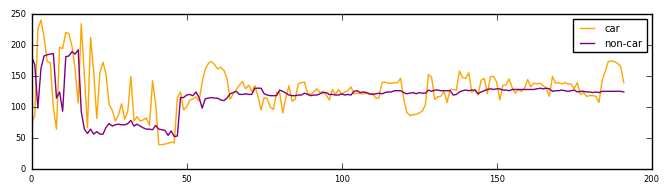

In [12]:
plt.rc('font',**{'size':6})
car_bin = color_bin_feat(car_cvt[0])
non_bin = color_bin_feat(non_cvt[0])
plt.rcParams['figure.figsize'] = (8, 2)
car_line, = plt.plot(car_bin, color = 'orange', label = 'car')
non_line, = plt.plot(non_bin, color = 'purple', label = 'non-car')
plt.legend(handles = [car_line, non_line])
plt.show()

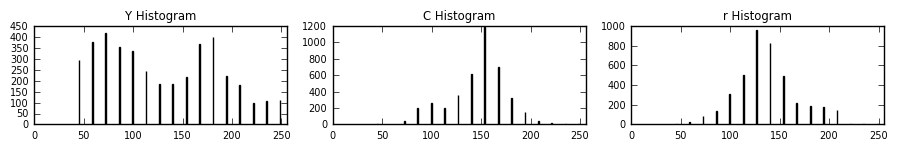

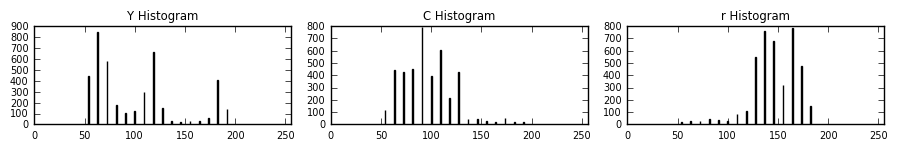

In [13]:
plt.rc('font',**{'size':7})
# Define a function to compute color histogram features  
def color_hist(img, nbins=hist_bins):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins = nbins)
    ghist = np.histogram(img[:,:,1], bins = nbins)
    bhist = np.histogram(img[:,:,2], bins = nbins)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.hstack([rhist[0], ghist[0], bhist[0]]) 
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
rh, gh, bh, bincen, feature_vec = color_hist(car_cvt[0])

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(9,1.5))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('%s Histogram'%cspace[0]) # YCrCb ignored....
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('%s Histogram'%cspace[1]) 
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('%s Histogram'%cspace[2]) 
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')
rh, gh, bh, bincen, feature_vec = color_hist(non_cvt[0])

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(9,1.5))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('%s Histogram'%cspace[0]) # YCrCb ignored....
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('%s Histogram'%cspace[1]) 
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('%s Histogram'%cspace[2]) 
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')
plt.show()

In [14]:
import pickle
with open('clf.pickle', 'rb') as f:
    clf, scaler, feat_maker = pickle.load(f)
detector = car_detector(clf, scaler, feat_maker)

In [18]:
img = cv2.cvtColor(cv2.imread('./test_images/test1.jpg'), cv2.COLOR_BGR2RGB)
detector.set_windows(normal_boexs)
im = detector.draw(img)

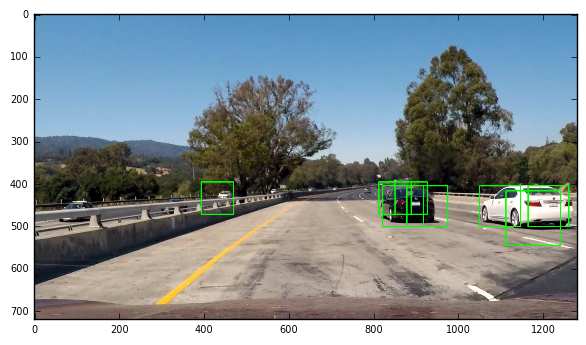

In [21]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.imshow(im)
plt.show()